In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.axes as ax

In [324]:
data = pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [328]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [330]:
data.duplicated().sum()

0

### Data Processing

In [333]:
data.dropna(inplace=True)

In [335]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [337]:
data.shape

(699, 2)

### Splitting the Data

In [340]:
# train_data = data.iloc[0:500]
# test_data = data.iloc[501:]

# train_input = train_data[['x']]
# train_output = train_data[['y']]

# test_input = test_data[['x']]
# test_output = test_data[['y']]


### One more way to to train test split

In [343]:
train_input = np.array(data['x'][0:500]).reshape(500,1)
train_output = np.array(data['y'][0:500]).reshape(500,1)


test_input = np.array(data['x'][500:700]).reshape(199,1)
test_output = np.array(data['y'][500:700]).reshape(199,1)

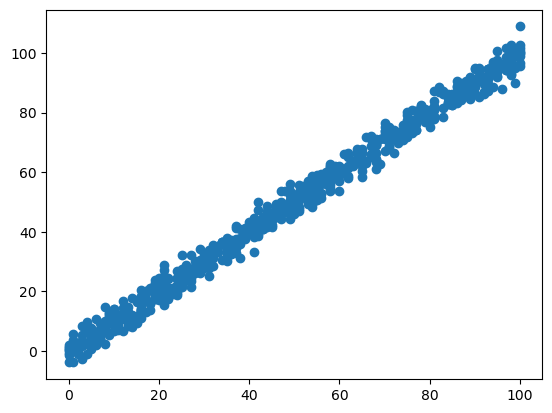

In [346]:
plt.scatter(x = data['x'], y = data['y'])

# Linear Regression

## Forward Propagation

### f(x) = m*x + c

In [552]:
def forward_propagation(train_input, parameters):
    # y_pred = []
    m = parameters["m"]
    c = parameters["c"]
    
    y_pred = np.multiply(m, train_input) + c  # because here m is scaler and train_input is vector so to multiply we have to use np.multiply()
    
    return y_pred
    

## Cost Function

### cost function = summation ((y_pred - y_actual)**2) / 2*n

In [556]:
def cost_function(y_pred, train_output):

    cost = np.mean((y_pred - train_output)**2) * 0.5  # here we are using np.mean because we are finding summation and dividing it by n which is mean.
                                                    # 0.5 becase we are also dividing it with 2 so we have multiplied it with 0.5
    
    return cost

## Gradient Descent and Back Propagation

### df = summation (y_pred - y) / n
### dm = df * x
### dc = df * 1

In [560]:
def backward_propagation(train_input, train_output, y_pred):
    derivatives = dict()
    
    df = y_pred - train_output
    dm = np.mean(np.multiply(df, train_input))  # this is derv of cost wrt m
    dc = np.mean(df) # this is derv of cost wrt c

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives


## Updated Parameters

### m = m - learning rate * dm
### c = c - learning rate * dc

In [564]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Model Training

In [567]:
def train(train_input, train_output, learning_rate, iters):  # numbers of times we want to run the iterations to find optimal value of m and c

    # random parameters
    parameters = {}
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    

    plt.figure()

    #loss
    loss = []
    

    for i in range(iters):
        print('m - ',parameters['m'])
        print('c - ',parameters['c'])

        #forward propagation
        y_pred = forward_propagation(train_input, parameters)

        #cost
        cost = cost_function(y_pred, train_output)

        loss.append(cost)

        print(f"Iteration = {i+1}, Loss = {cost}")

        #plot
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, y_pred, "*", label = "Training")

        legend = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, y_pred, "*", label = "Training")

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, y_pred)

        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

        
        
    return parameters, loss


## Training

m -  0.14613309777685046
c -  0.22466505848224605
Iteration = 1, Loss = 1177.0403245433763


<Figure size 640x480 with 0 Axes>

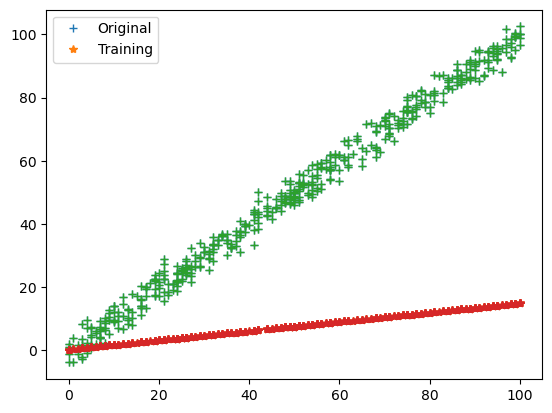

m -  0.42284390364595137
c -  0.2288428824064756
Iteration = 2, Loss = 536.1761535586941


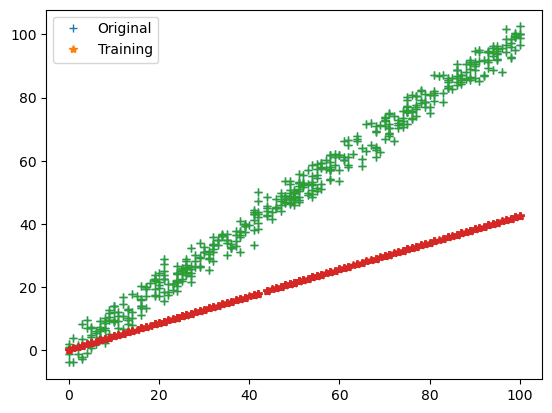

m -  0.609228997312211
c -  0.23165306045651352
Iteration = 3, Loss = 245.41536855816173


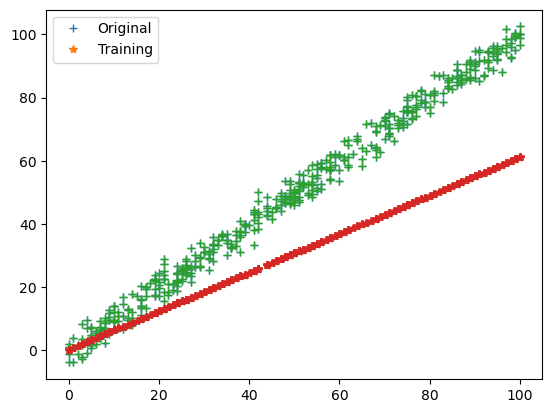

m -  0.7347730950775729
c -  0.23354202874094143
Iteration = 4, Loss = 113.49687756761705


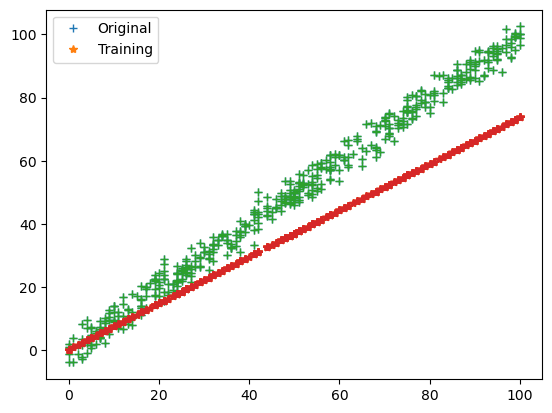

m -  0.8193363171655397
c -  0.23481049474148225
Iteration = 5, Loss = 53.645311309714245


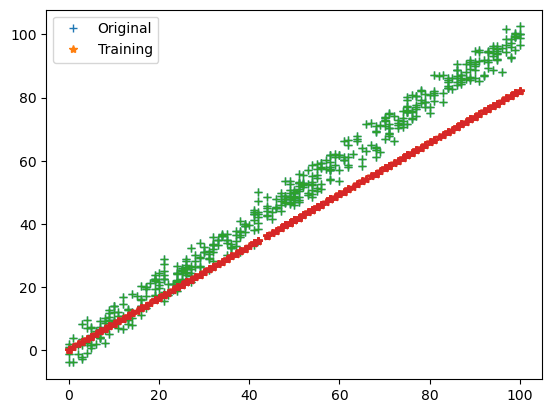

m -  0.87629591202079
c -  0.23566100701508635
Iteration = 6, Loss = 26.490588627346167


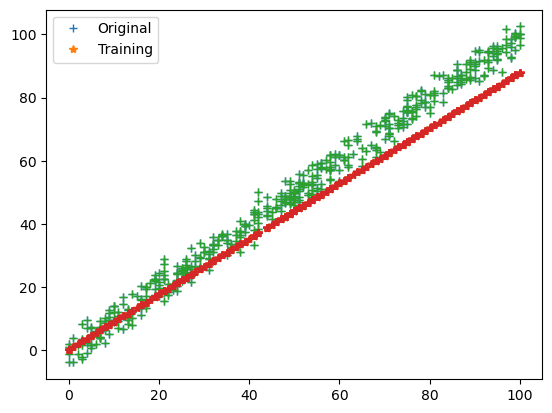

m -  0.9146624381866149
c -  0.2362299968792833
Iteration = 7, Loss = 14.17046009160887


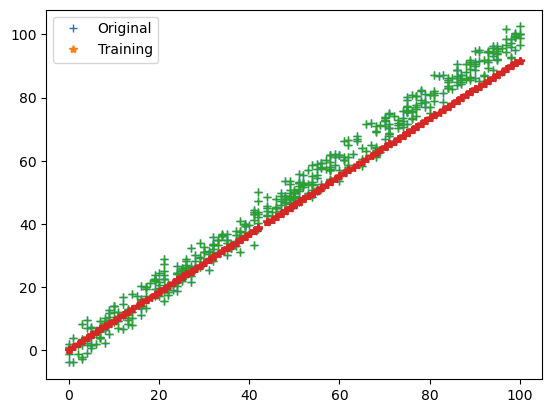

m -  0.9405051680995566
c -  0.2366093608387085
Iteration = 8, Loss = 8.580803351644997


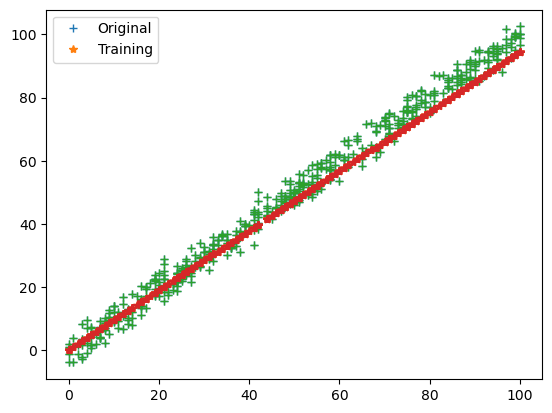

m -  0.9579122021511725
c -  0.23686099793323792
Iteration = 9, Loss = 6.044769120410628


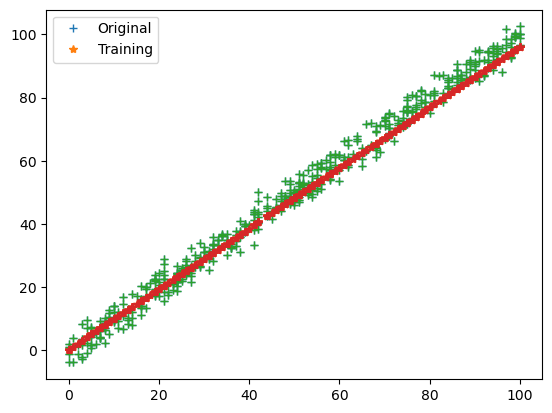

m -  0.9696371759684982
c -  0.23702660170880885
Iteration = 10, Loss = 4.894166803744084


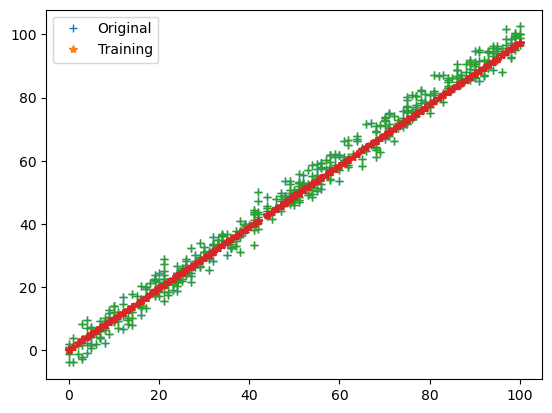

m -  0.9775348652273317
c -  0.2371342558283708
Iteration = 11, Loss = 4.372136481317604


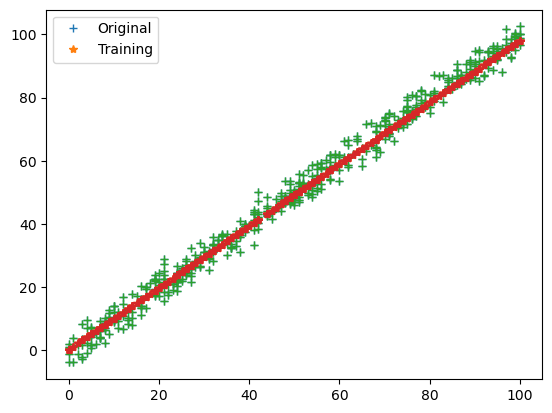

m -  0.9828545974616995
c -  0.23720287669989293
Iteration = 12, Loss = 4.13528996894922


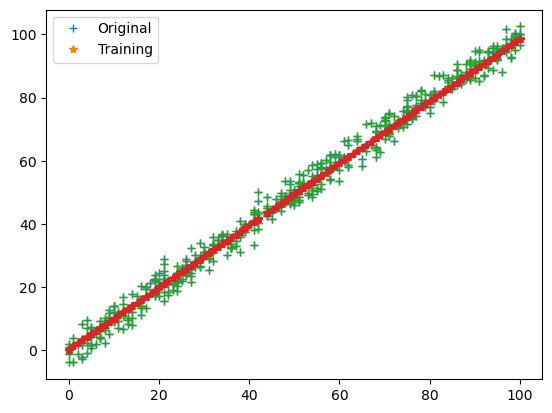

m -  0.9864378864501371
c -  0.23724520591235787
Iteration = 13, Loss = 4.027831667124671


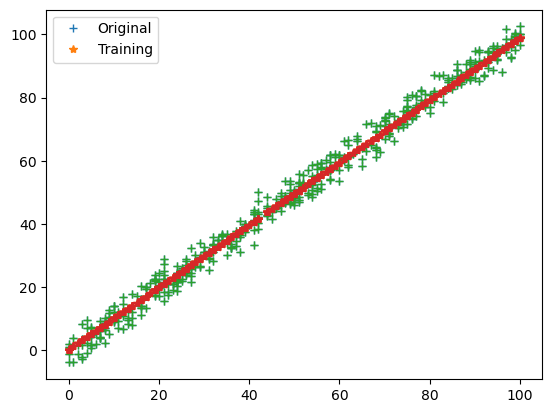

m -  0.9888515534786391
c -  0.2372698258610097
Iteration = 14, Loss = 3.9790769397787065


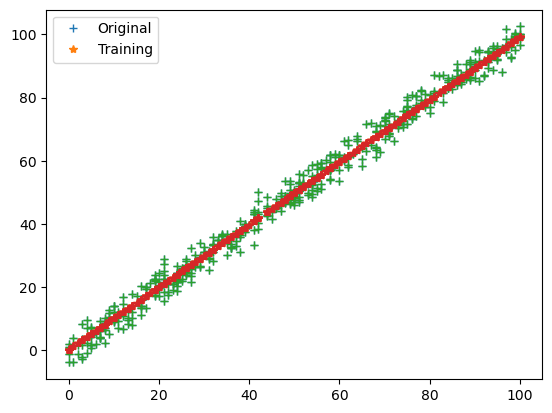

m -  0.9904773942806225
c -  0.23728251741887885
Iteration = 15, Loss = 3.956956089235302


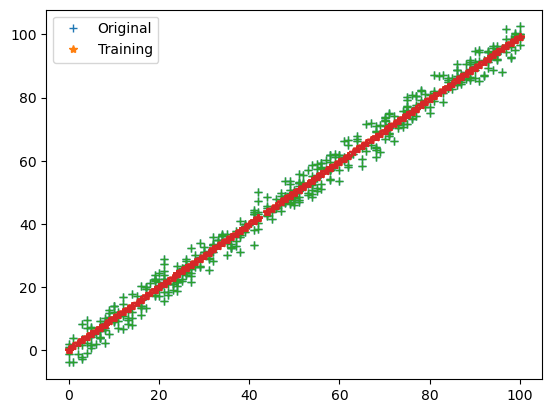

m -  0.9915725763013777
c -  0.2372871744281896
Iteration = 16, Loss = 3.9469190581371247


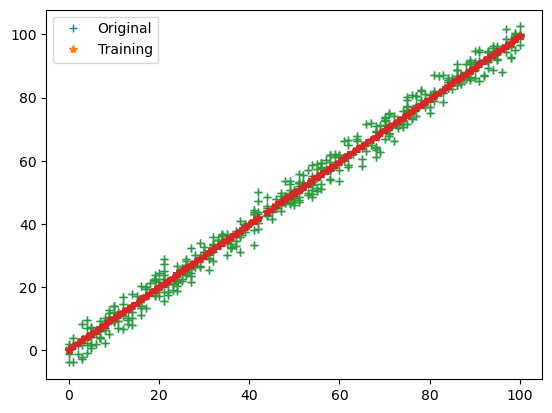

m -  0.9923103206880489
c -  0.23728641967743488
Iteration = 17, Loss = 3.9423644693449114


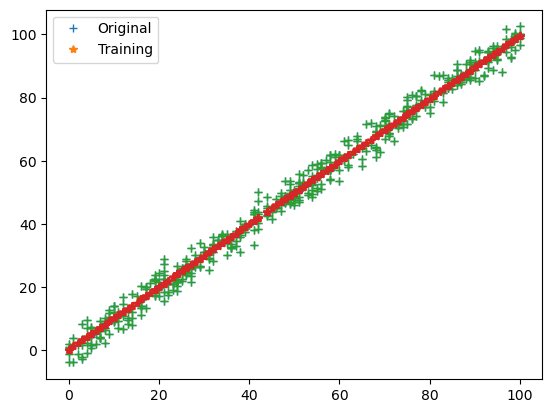

m -  0.9928073045954136
c -  0.2372820198071407
Iteration = 18, Loss = 3.9402972707386117


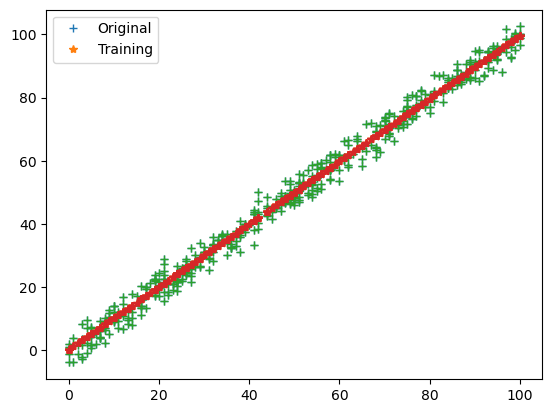

m -  0.9931421186497977
c -  0.23727516477934724
Iteration = 19, Loss = 3.9393586038539214


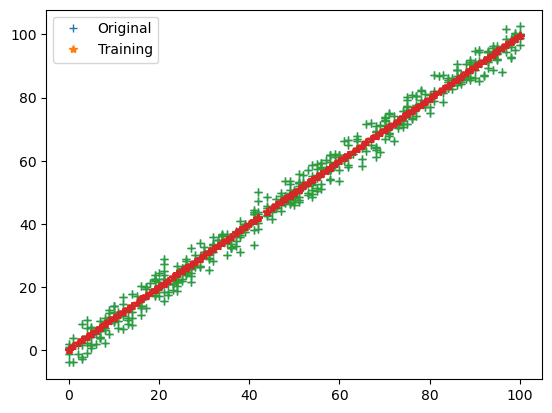

m -  0.9933676994055607
c -  0.23726665612081385
Iteration = 20, Loss = 3.938931953100452


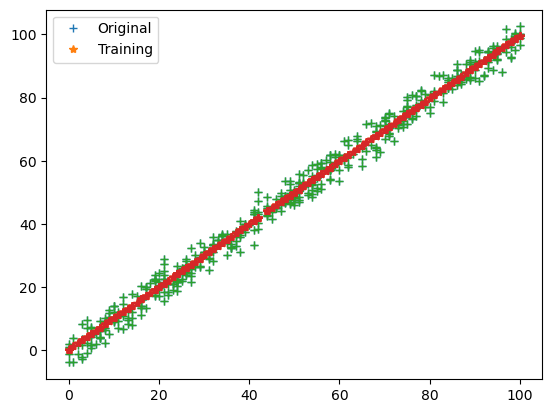

In [570]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [459]:
print(parameters)

{'m': 0.9844913398889177, 'c': 0.850507242381065}


In [584]:
def forward_propagation(train_input, parameters):

    m = parameters['m']
    c = parameters['c']
    y_pred = np.multiply(m, train_input) + c

    return y_pred

def cost_function(y_pred, train_output):

    cost = (np.mean(((y_pred - train_output)**2))) * 0.5
    return cost

def backword_propagation(y_pred, train_output, train_input):

    derivatives = {}
    dm = np.mean(np.multiply((y_pred - train_output),train_input))
    dc = np.mean(y_pred - train_output)

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

def update_parameter(parameters, learning_rate, derivatives):

    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

    return parameters

def train(train_input, train_output, learning_rate, iters):

    parameters = {}

    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    

    for i in range(iters):
        print('m - ',parameters['m'])
        print('c - ',parameters['c'])

        y_pred = forward_propagation(train_input, parameters)

        cost = cost_function(y_pred, train_output)
        print("Cost is - ",cost)

        derivatives = backword_propagation(y_pred, train_output, train_input)

        parameters = update_parameter(parameters, learning_rate, derivatives)


    return parameters


    
    

In [586]:
final = train(train_input, train_output, 0.0001, 20)

print(final)

m -  0.2555979333120959
c -  0.08571825647304909
Cost is -  898.7550203300154
m -  0.4972712292162929
c -  0.08936910932509992
Cost is -  409.91000201992983
m -  0.6600559711262806
c -  0.0918254893368029
Cost is -  188.12047536349186
m -  0.7697034825277705
c -  0.09347730430072747
Cost is -  87.4943210720022
m -  0.843559169600127
c -  0.09458718572932089
Cost is -  41.84012302805386
m -  0.8933064363320444
c -  0.09533203521994693
Cost is -  21.126762422838787
m -  0.9268149127195874
c -  0.0958310089807015
Cost is -  11.729087389095747
m -  0.9493853720934463
c -  0.09616436746224916
Cost is -  7.465351432868622
m -  0.9645882742995622
c -  0.09638617196818242
Cost is -  5.5308893226923646
m -  0.9748285860694244
c -  0.09653283675386466
Cost is -  4.653221336488429
m -  0.9817262289899248
c -  0.09662888949261345
Cost is -  4.255022014898826
m -  0.9863723391309804
c -  0.09669085137241816
Cost is -  4.0743581575433385
m -  0.9895018767108562
c -  0.09672985062582794
Cost is -  3.

## Let's Predict

In [593]:
parameters['c'] 

0.2372570337186321

In [595]:
test_prediction = parameters['m'] * test_input + parameters['c']

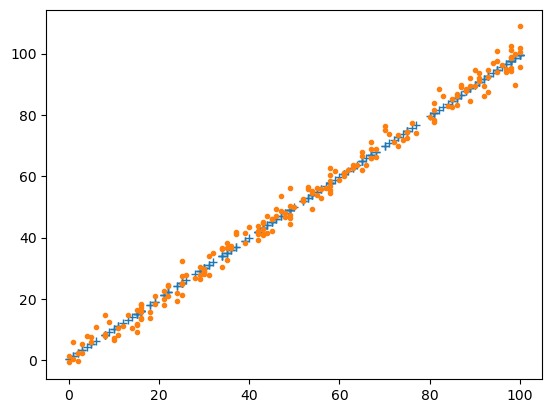

In [599]:
plt.plot(test_input, test_prediction, "+")
plt.plot(test_input, test_output, ".")
plt.show()

## Cost of Prediction

In [602]:
cost_function(test_prediction, test_output)

3.9968184753802367

### means the value that we are predicting is 5 then the actual value will be in range (1,9)
### pred +- 4

### So cost means how close we are to prediction